In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Baca dataset
df = pd.read_csv("Extrovert vs. Introvert Personality Traits Dataset_Syncoraai_Synthetic data.csv")

In [6]:
# Pisahkan fitur dan label
X = df.drop(columns=["Personality"])
y_true = df["Personality"]

In [7]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)


In [9]:
# Evaluasi
conf_matrix = confusion_matrix(y_true, y_kmeans)
accuracy = accuracy_score(y_true, y_kmeans)
report = classification_report(y_true, y_kmeans, target_names=["Extrovert", "Introvert"])

In [10]:
# Tampilkan hasil
print("Confusion Matrix:\n", conf_matrix)
print(f"\nAccuracy: {accuracy:.2%}")
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[2404  193]
 [ 125 2276]]

Accuracy: 93.64%

Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.95      0.93      0.94      2597
   Introvert       0.92      0.95      0.93      2401

    accuracy                           0.94      4998
   macro avg       0.94      0.94      0.94      4998
weighted avg       0.94      0.94      0.94      4998



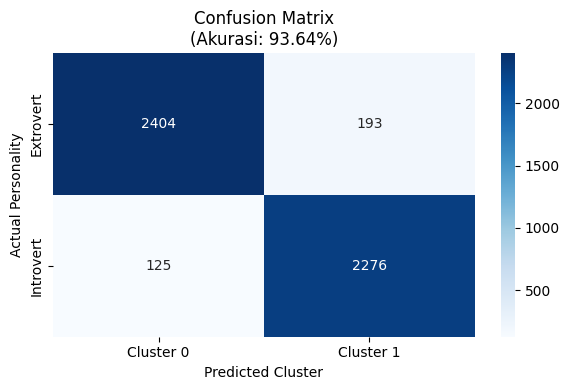

In [11]:
# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Extrovert", "Introvert"])
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Personality")
plt.title(f"Confusion Matrix\n(Akurasi: {accuracy:.2%})")
plt.tight_layout()
plt.show()